<a href="https://colab.research.google.com/github/SriramKurapati/HW_2/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_df = pd.read_csv('sample_submission.csv')

train = train_df.copy()
test = test_df.copy()
sample = sample_df.copy()
train_test = pd.concat([train,test],axis=0,ignore_index=True)

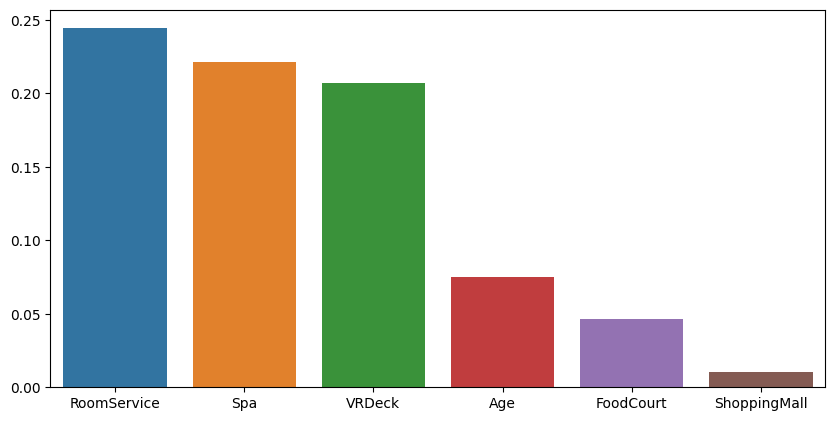

In [ ]:
impfeatures = train.corr().Transported.abs().sort_values(ascending=False).drop('Transported',axis=0)
plt.figure(figsize=(10,5),dpi=100)
sns.barplot(x=impfeatures.index,y=impfeatures.values)


In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
# Transported 
train.Transported.sum()/len(train)

0.5036236051995858

In [ ]:
train_test.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [ ]:
train['PassengerGroup'] = train.PassengerId.str.split('_',expand=True)[0].astype('int')
test['PassengerGroup'] = test.PassengerId.str.split('_',expand=True)[0].astype('int')

len(set(train['PassengerGroup'])) + len(set(test['PassengerGroup'])) - len(set(list(train['PassengerGroup'])+list(test['PassengerGroup'])))

0

In [ ]:
train['HomePlanet'] = train['HomePlanet'].fillna(value='Unknown')
test['HomePlanet'] = test['HomePlanet'].fillna(value='Unknown')

In [ ]:
# CryoSleep
train['CryoSleep'] = train['CryoSleep'].fillna(value=False)
test['CryoSleep'] = test['CryoSleep'].fillna(value=False)

In [ ]:
# Cabin
train['CabinDeck'] = train['Cabin'].str.split('/',expand=True)[0]
test['CabinDeck'] = test['Cabin'].str.split('/',expand=True)[0]
train['CabinDeck'] = train['CabinDeck'].fillna(value='U')
test['CabinDeck'] = test['CabinDeck'].fillna(value='U')

train['CabinSide'] = train['Cabin'].str.split('/',expand=True)[2]
test['CabinSide'] = test['Cabin'].str.split('/',expand=True)[2]
train['CabinSide'] = train['CabinSide'].fillna(value='U')
test['CabinSide'] = test['CabinSide'].fillna(value='U')

In [ ]:
# Destination
dest_dic = {'TRAPPIST-1e':'A','55 Cancri e':'B','PSO J318.5-22':'C'}
train['Destination'] = train['Destination'].map(dest_dic)
train['Destination'] = train['Destination'].fillna(value='U')
test['Destination'] = test['Destination'].map(dest_dic)
test['Destination'] = test['Destination'].fillna(value='U')

In [ ]:
# Age
train['Age'] = train['Age'].fillna(train.groupby('PassengerGroup')['Age'].transform('median'))
train['Age'] = train['Age'].fillna(train.groupby('HomePlanet')['Age'].transform('median'))

test['Age'] = test['Age'].fillna(test.groupby('PassengerGroup')['Age'].transform('median'))
test['Age'] = test['Age'].fillna(test.groupby('HomePlanet')['Age'].transform('median'))

train['Adult'] = 1
train.loc[train['Age']<18, 'Adult'] = 0

test['Adult'] = 1
test.loc[test['Age']<18, 'Adult'] = 0

In [ ]:
# VIP
train['VIP'] = train['VIP'].fillna(value=False)
test['VIP'] = test['VIP'].fillna(value=False)

In [ ]:
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(value=0)
test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(value=0)

In [ ]:
# Total Spend
train['TotalSpend'] = train['RoomService']+train['FoodCourt']+train['ShoppingMall']+train['Spa']+train['VRDeck']
test['TotalSpend'] = test['RoomService']+test['FoodCourt']+test['ShoppingMall']+test['Spa']+test['VRDeck']

In [ ]:
# Name
train['FamilyName'] = train['Name'].str.split(' ',expand=True)[1]
train['FamilyName'] = train['FamilyName'].fillna('Unknown')

test['FamilyName'] = test['Name'].str.split(' ',expand=True)[1]
test['FamilyName'] = test['FamilyName'].fillna('Unknown')

train_test['FamilyName'] = train_test['Name'].str.split(' ',expand=True)[1]
train_test['FamilyName'] = train_test['FamilyName'].fillna('Unknown')

family_name_dic = train_test['FamilyName'].value_counts().to_dict()
family_name_dic['Unknown'] = 0

train['FamilyMember'] = train['FamilyName']
train['FamilyMember'] = train['FamilyMember'].map(family_name_dic)

test['FamilyMember'] = test['FamilyName']
test['FamilyMember'] = test['FamilyMember'].map(family_name_dic)

In [ ]:
train = train.drop(['PassengerId','PassengerGroup','Cabin','Name','FamilyName'],axis=1)
test = test.drop(['PassengerId','PassengerGroup','Cabin','Name','FamilyName'],axis=1)

In [ ]:
# Convert Bool to Int
train[['CryoSleep','VIP','Transported']] = train[['CryoSleep','VIP','Transported']].astype(int)
test[['CryoSleep','VIP']] = test[['CryoSleep','VIP']].astype(int)

In [ ]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,Europa,0,A,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,P,1,0.0,3
1,Earth,0,A,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,S,1,736.0,4
2,Europa,0,A,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,S,1,10383.0,7
3,Europa,0,A,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,S,1,5176.0,7
4,Earth,0,A,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,S,0,1091.0,9


In [ ]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,Earth,1,A,27.0,0,0.0,0.0,0.0,0.0,0.0,G,S,1,0.0,8
1,Earth,0,A,19.0,0,0.0,9.0,0.0,2823.0,0.0,F,S,1,2832.0,4
2,Europa,1,B,31.0,0,0.0,0.0,0.0,0.0,0.0,C,S,1,0.0,6
3,Europa,0,A,38.0,0,0.0,6652.0,0.0,181.0,585.0,C,S,1,7418.0,2
4,Earth,0,A,20.0,0,10.0,0.0,635.0,0.0,0.0,F,S,1,645.0,5


In [ ]:
# Feature Scaling
num_features = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalSpend','FamilyMember']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_num_scaled = scaler.fit_transform(train[num_features])
test_num_scaled = scaler.transform(test[num_features])

train_num_scaled = pd.DataFrame(data=train_num_scaled,columns=num_features)
test_num_scaled = pd.DataFrame(data=test_num_scaled,columns=num_features)

# Feature Encoding
cat_features = ['HomePlanet','CryoSleep','Destination','VIP','CabinDeck','CabinSide','Adult']

train_cat_encoded = pd.get_dummies(train[cat_features],drop_first=True)
test_cat_encoded = pd.get_dummies(test[cat_features],drop_first=True)

In [ ]:
# Train and Test
X = pd.concat([train_num_scaled,train_cat_encoded],axis=1)
X_test = pd.concat([test_num_scaled,test_cat_encoded],axis=1)
y = train.Transported
X_all = pd.concat([X,y],axis=1)

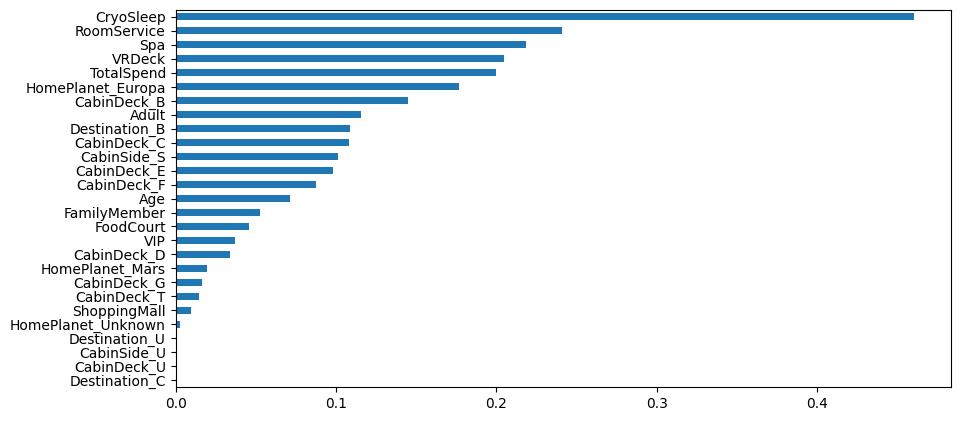

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
X_all.corr().Transported.abs().sort_values(ascending=True).iloc[:-1].plot.barh()

In [ ]:
# Train Valid Split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

In [ ]:
# Logistic Regression
print('Running LogisticRegression\n')
logreg = LogisticRegression(max_iter = 600)
scores = cross_val_score(logreg,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
logreg_mse = round(abs(scores.mean()), 4)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_valid)
logreg_acc = round(metrics.accuracy_score(y_valid, y_pred), 4)


# Decision Tree
print('Running DecisionTreeClassifier\n')
decision_tree = DecisionTreeClassifier()
scores = cross_val_score(decision_tree,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
decision_tree_mse = round(abs(scores.mean()), 4)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_valid)
decision_tree_acc = round(metrics.accuracy_score(y_valid, y_pred), 4)

# Random Forest
print('Running RandomForestClassifier\n')
random_forest = RandomForestClassifier()
scores = cross_val_score(random_forest,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
random_forest_mse = round(abs(scores.mean()), 4)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_valid)
random_forest_acc = round(metrics.accuracy_score(y_valid, y_pred), 4)


# Catboost
print('Running CatBoostClassifier\n')
catb = CatBoostClassifier(verbose = 0)
scores = cross_val_score(catb,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
catb_mse = round(abs(scores.mean()), 4)
catb.fit(X_train, y_train)
y_pred = catb.predict(X_valid)
catb_acc = round(metrics.accuracy_score(y_valid, y_pred), 4)

# Histogram-based Gradient Boosting Classification Tree
print('Running HistGradientBoostingClassifier\n')
hgb = HistGradientBoostingClassifier()
scores = cross_val_score(hgb,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
hgb_mse = round(abs(scores.mean()), 4)
hgb.fit(X_train, y_train)
y_pred = hgb.predict(X_valid)
hgb_acc = round(metrics.accuracy_score(y_valid, y_pred), 4)

model_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'GB', 'LightGBM', 'Catboost', 'HistBoost'],
    'Train MSE': [logreg_mse, decision_tree_mse, random_forest_mse, xgb_mse, gb_mse, lgbm_mse, catb_mse, hgb_mse],
    'Validation Accuracy': [logreg_acc, decision_tree_acc, random_forest_acc, xgb_acc, gb_acc, lgbm_acc, catb_acc, hgb_acc]
})

print(model_df.sort_values('Validation Accuracy', ascending = False).reset_index(drop = True))

Running LogisticRegression

Running DecisionTreeClassifier

Running RandomForestClassifier

Running XGBClassifier

Running GradientBoostingClassifier

Running LGBMClassifier

Running CatBoostClassifier

Running HistGradientBoostingClassifier

                 Model  Train MSE  Validation Accuracy
0             Catboost     0.2013               0.8198
1            HistBoost     0.2067               0.8090
2                   GB     0.2076               0.8087
3             LightGBM     0.2072               0.8075
4              XGBoost     0.2069               0.8060
5        Random Forest     0.2217               0.7937
6  Logistic Regression     0.2365               0.7784
7        Decision Tree     0.2777               0.7324


In [ ]:
#  Grid Search on Catboost
catb = CatBoostClassifier(verbose = 0)
param_grid = {'iterations':[300,400,500,1000],
              'learning_rate':[0.01,0.03,0.05,0.07,0.09],
              'depth':[2,5,10]
             }

grid = GridSearchCV(estimator=catb, param_grid=param_grid, cv=5)
grid.fit(X,y)
print('Mean accuracy:',grid.score(X,y))
print('Best hyperparameters:',grid.best_params_)

Mean accuracy: 0.831818704704935
Best hyperparameters: {'depth': 5, 'iterations': 300, 'learning_rate': 0.05}


In [ ]:
# Tuned Catboost
catb = CatBoostClassifier(depth=5,iterations=300,learning_rate=0.05,verbose=0)

In [ ]:
# Submitting
model=catb
model.fit(X,y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Transported': predictions})
output['Transported'] = output['Transported'].astype('bool')
output.to_csv('submission.csv', index=False)